In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
# uploading the dataset to google colab
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising (1).csv


In [ ]:
df = pd.read_csv('advertising.csv')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


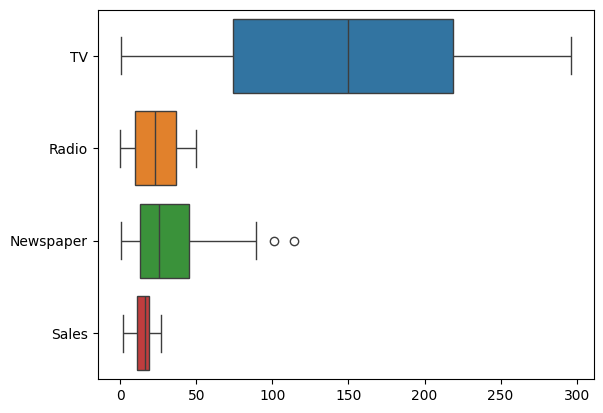

In [ ]:
sns.boxplot(data = df, orient = 'h')
plt.show()

In [ ]:
upper_limit = df['Newspaper'].quantile(0.99)
lower_limit = df['Newspaper'].quantile(0.01)
print(upper_limit)
print(lower_limit)


89.5149999999999
0.999


In [ ]:
#  Winsorization
df['Newspaper'] = np.where(df['Newspaper'] >= upper_limit,
        upper_limit,
        np.where(df['Newspaper'] <= lower_limit,
        lower_limit,
        df['Newspaper']))

<Axes: >

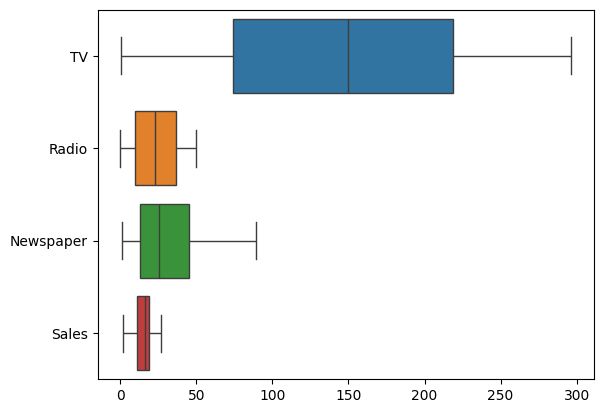

In [ ]:
sns.boxplot(df, orient = 'h')

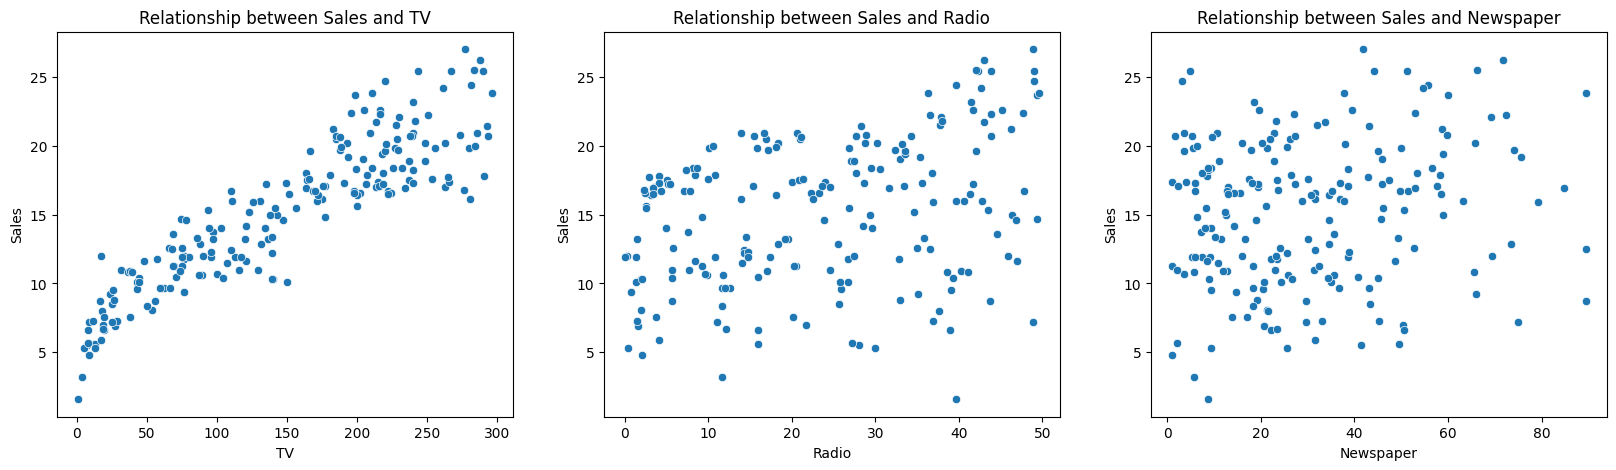

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(data = df, x= 'TV', y='Sales')
plt.title('Relationship between Sales and TV')
plt.subplot(1,3,2)
sns.scatterplot(data = df, x= 'Radio', y='Sales')
plt.title('Relationship between Sales and Radio')
plt.subplot(1,3,3)
sns.scatterplot(data = df, x= 'Newspaper', y='Sales')
plt.title('Relationship between Sales and Newspaper')
plt.show()

<Axes: >

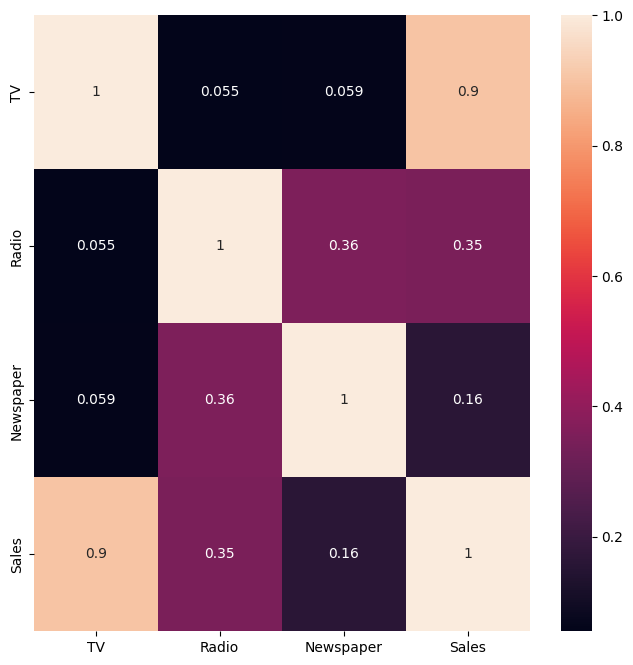

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True)

In [ ]:
# Separate features and target variable
X = df.drop('Sales', axis=1)
y = df['Sales']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree Regressor':  DecisionTreeRegressor(random_state=42),
    'Gradient Boosting regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, random_state=42),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5)

}


In [ ]:
# Train and evaluate models
result = {}
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - ((1-r2)*(200-1)/(200-1-3))
    result[model_name] = adj_r2
    predictions[model_name] = y_pred
    print(f'{model_name}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared Score: {r2}')
    print(f'adjusted R-squared Score: {adj_r2}')
    print('-'*30)


Linear Regression
Mean Absolute Error: 1.2733245125286103
Mean Squared Error: 2.911686699988967
R-squared Score: 0.9057740112815088
adjusted R-squared Score: 0.9043317767603074
------------------------------
Ridge Regression
Mean Absolute Error: 1.2733315886279417
Mean Squared Error: 2.911726119495302
R-squared Score: 0.9057727356147418
adjusted R-squared Score: 0.9043304815680286
------------------------------
Lasso Regression
Mean Absolute Error: 1.2750218766165067
Mean Squared Error: 2.9322518149043466
R-squared Score: 0.9051084972734191
adjusted R-squared Score: 0.9036560763133185
------------------------------
Random Forest Regressor
Mean Absolute Error: 0.9172999999999993
Mean Squared Error: 1.4368613500000007
R-squared Score: 0.9535012879800395
adjusted R-squared Score: 0.9527895730001422
------------------------------
Decision Tree Regressor
Mean Absolute Error: 1.24
Mean Squared Error: 3.4019999999999997
R-squared Score: 0.8899068317956319
adjusted R-squared Score: 0.888221732

In [ ]:
# Select the best model
best_model_name = max(result, key=result.get)
best_model = models[best_model_name]
print(f'Best model: {best_model_name} - Adjusted R-square: {result[best_model_name]}')

Best model: Gradient Boosting regressor - Adjusted R-square: 0.9573347089521451


In [ ]:
# Comparing the actual output values with the predicted values
best_model_predictions = predictions[best_model_name]
comparison_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': np.round(best_model_predictions,1)})
print(comparison_df)

     Actual Sales  Predicted Sales
95           16.9             17.4
15           22.4             23.2
30           21.4             20.3
158           7.3              6.2
128          24.7             23.8
115          12.6             13.7
69           22.3             22.4
170           8.4              9.6
174          16.5             16.7
45           16.1             16.1
66           11.0              7.9
182           8.7              9.8
165          16.9             17.8
78            5.3              3.9
186          10.3             11.0
177          16.7             15.8
56            5.5              6.1
152          16.6             17.6
82           11.3             11.3
68           18.9             19.7
124          19.7             20.1
16           12.5             13.8
148          10.9              9.8
93           22.2             22.6
65           11.3              9.9
60            8.1              9.2
84           21.7             21.6
67           13.4   